# **Task 4**

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in and display data
data = pd.read_csv("./data/task_4.csv")
display(data)

,sensor_id,recording_date,CONTRAST_SNR_mean,ENERGY_SNR_mean,CONTRAST_std,ENERGY_SNR_std
0,1,2024-02-27,8.807466,6.699685,1.108523,1.482274
1,1,2024-02-28,8.684759,6.479729,0.999695,1.438308
2,1,2024-02-29,9.404301,7.888032,0.968853,1.576718
3,1,2024-03-01,8.687764,7.286269,1.180071,1.781547
4,1,2024-03-04,8.834038,8.060320,1.113161,1.431130
...,...,...,...,...,...,...
358,6,2024-04-10,9.041616,6.631269,0.954606,1.759070
359,6,2024-03-21,8.907262,6.233908,0.865766,1.773210
360,6,2024-03-26,8.516539,6.595784,1.156861,1.492651
361,6,2024-03-27,8.479708,6.930803,0.948583,1.113606


In [3]:
print(data.columns)
print(data.shape)

Index(['sensor_id', 'recording_date', 'CONTRAST_SNR_mean', 'ENERGY_SNR_mean',
       'CONTRAST_std', 'ENERGY_SNR_std'],
      dtype='object')
(363, 6)


In [4]:
# Check the amount of data points per sensor
sensor_data = data['sensor_id'].value_counts()
print(sensor_data)

sensor_id
1    82
2    76
3    69
4    63
5    37
6    36
Name: count, dtype: int64


In [5]:
# Check how many NaNs there are
counter = data.isnull().sum()
print("\nNum NaN values per column:")
print(counter)


Num NaN values per column:
sensor_id            0
recording_date       0
CONTRAST_SNR_mean    1
ENERGY_SNR_mean      0
CONTRAST_std         3
ENERGY_SNR_std       3
dtype: int64


In [6]:
# Remove NaN values since there isn't a lot and they'll skew the data
data = data.dropna()
print(data.shape)

(360, 6)


In [7]:
statistics = data.groupby('sensor_id').describe()
display(statistics)

CONTRAST_SNR_mean                                                    \
                      count      mean       std       min       25%       50%   
sensor_id                                                                       
1                      82.0  8.937053  0.454155  7.998710  8.679645  8.855240   
2                      76.0  8.952238  0.390349  7.886073  8.727841  8.992896   
3                      69.0  8.938720  0.237662  8.293177  8.794996  8.922200   
4                      63.0  8.965951  0.571291  7.596354  8.630840  8.909839   
5                      35.0  8.877654  0.462076  8.065269  8.608008  8.813778   
6                      35.0  8.911552  0.466707  8.074426  8.560176  8.907262   

                               ENERGY_SNR_mean            ... CONTRAST_std  \
                75%        max           count      mean  ...          75%   
sensor_id                                                 ...                
1          9.285559  10.006565            82.0  6.791763  ...     1.185812   
2          9.246009   9.650674            76.0  6.920081  ...     1.178527   
3          9.087200   9.487883            69.0  7.072331  ...     1.060566   
4          9.268542  10.317881            63.0  6.911536  ...     1.084541   
5          9.131885   9.964464            35.0  6.628777  ...     1.079422   
6          9.177693  10.087685            35.0  6.834656  ...     1.181647   

                    ENERGY_SNR_std                                          \
                max          count      mean       std       min       25%   
sensor_id                                                                    
1          1.845096           82.0  1.355147  0.392495  0.390993  1.087882   
2          1.722421           76.0  1.342307  0.328080  0.636480  1.087346   
3          1.330817           69.0  1.358523  0.241325  0.766231  1.215722   
4          1.785981           63.0  1.260836  0.430869  0.373023  1.047486   
5          1.816938           35.0  1.240912  0.416486  0.757583  1.046955   
6          1.782576           35.0  1.407276  0.448287  0.570311  1.102164   

                                         
                50%       75%       max  
sensor_id                                
1          1.385760  1.624968  2.535430  
2          1.275495  1.633931  2.051365  
3          1.357609  1.490280  2.061804  
4          1.226813  1.417432  2.765007  
5          1.108672  1.352874  2.766691  
6          1.418798  1.572107  2.676499  

[6 rows x 32 columns]

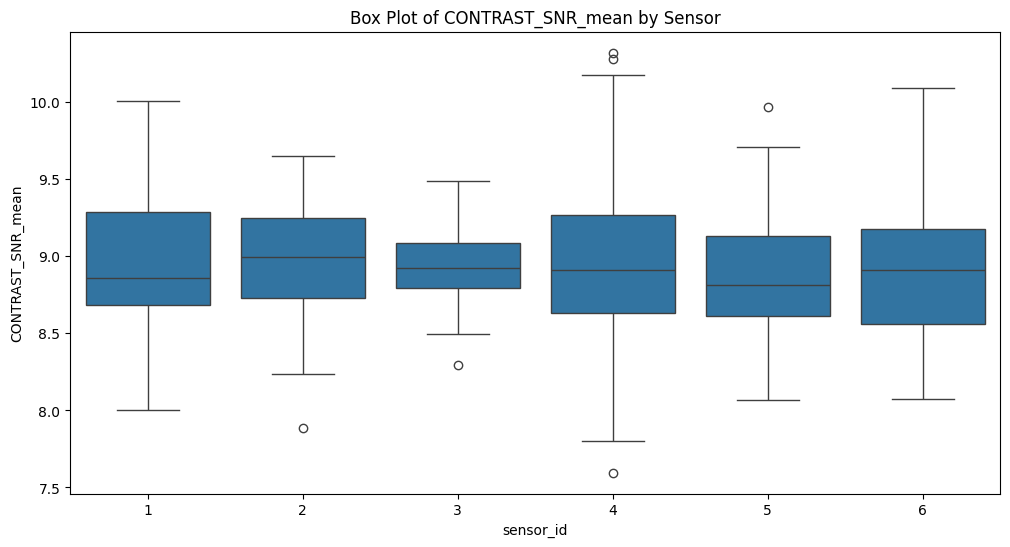

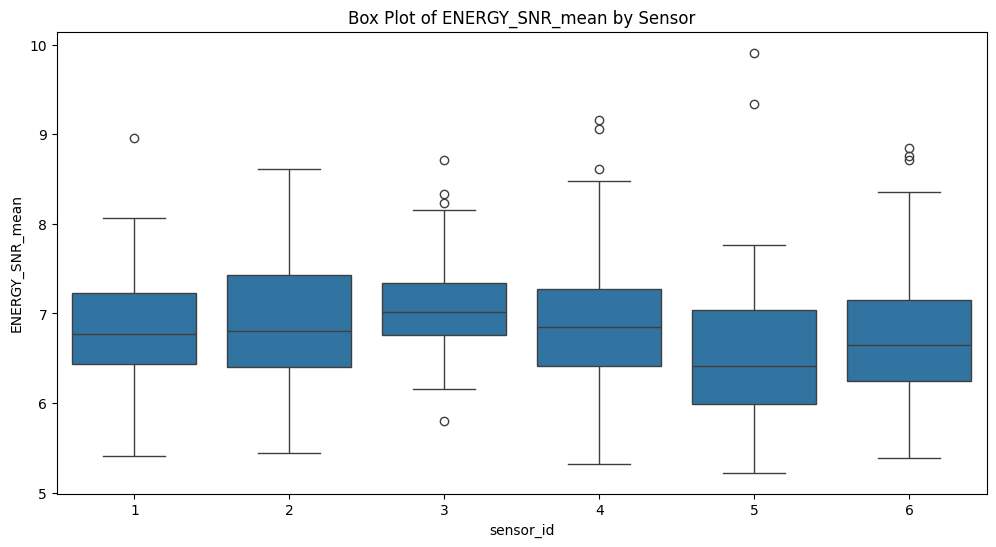

In [8]:
# Plot box plots
# CONTRAST_SNR_mean
plt.figure(figsize=(12, 6))
sns.boxplot(x='sensor_id', y='CONTRAST_SNR_mean', data=data)
plt.title('Box Plot of CONTRAST_SNR_mean by Sensor')
plt.show()

# ENERGY_SNR_mean
plt.figure(figsize=(12, 6))
sns.boxplot(x='sensor_id', y='ENERGY_SNR_mean', data=data)
plt.title('Box Plot of ENERGY_SNR_mean by Sensor')
plt.show()

On basis of the box plots, sensor 3 seems to be inherently different from the rest. Sensors 1, 4, and 6 seem very similar both in regards to their ENERGY_SNR_mean and CONTRAST_SNR_mean. 

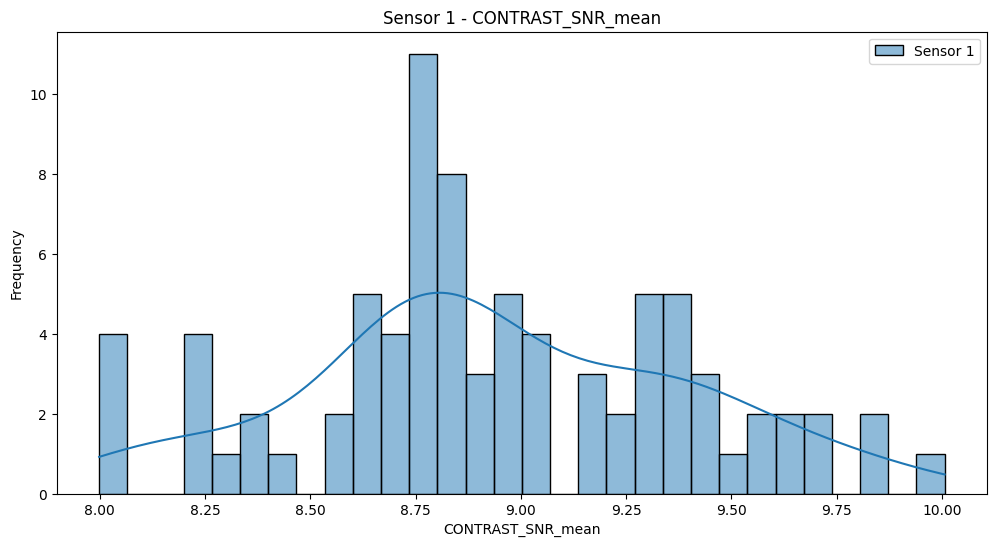

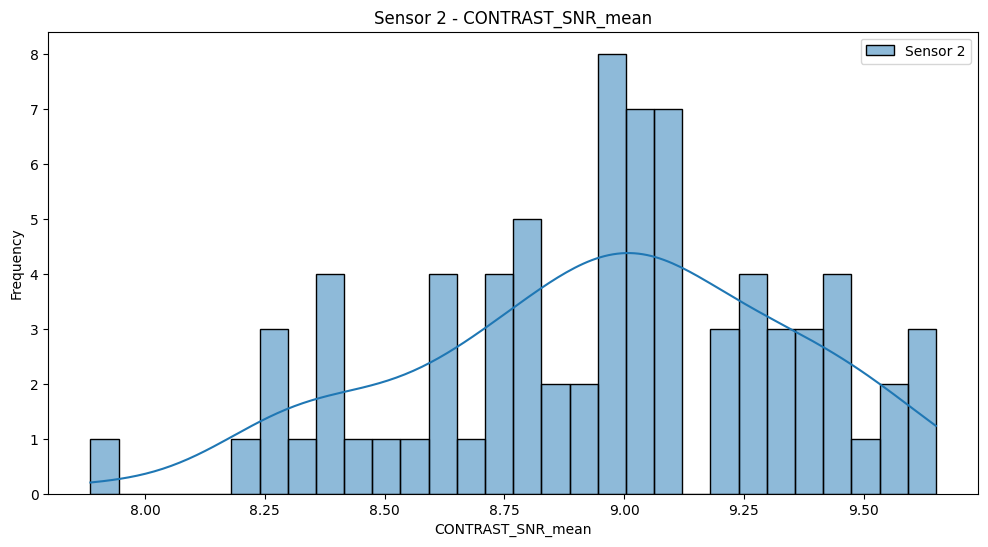

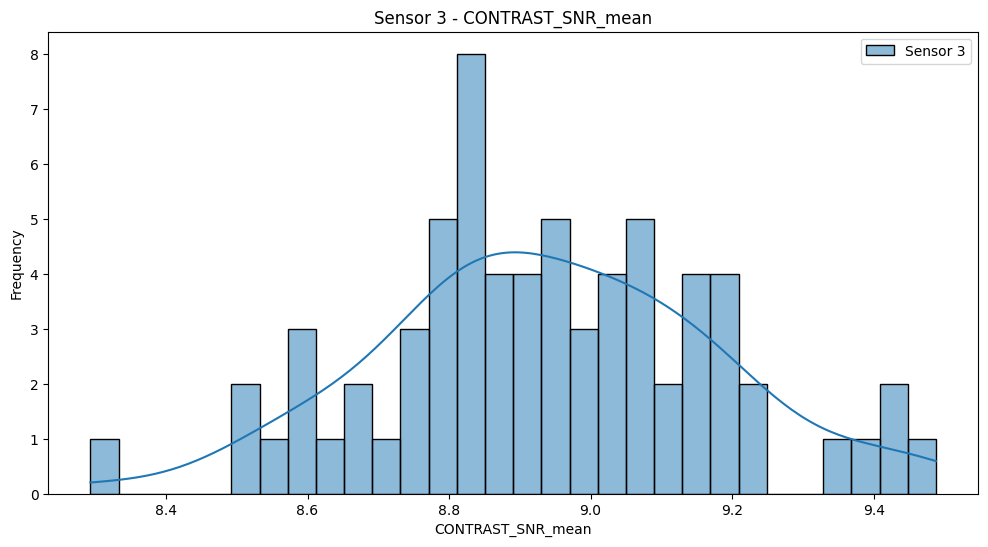

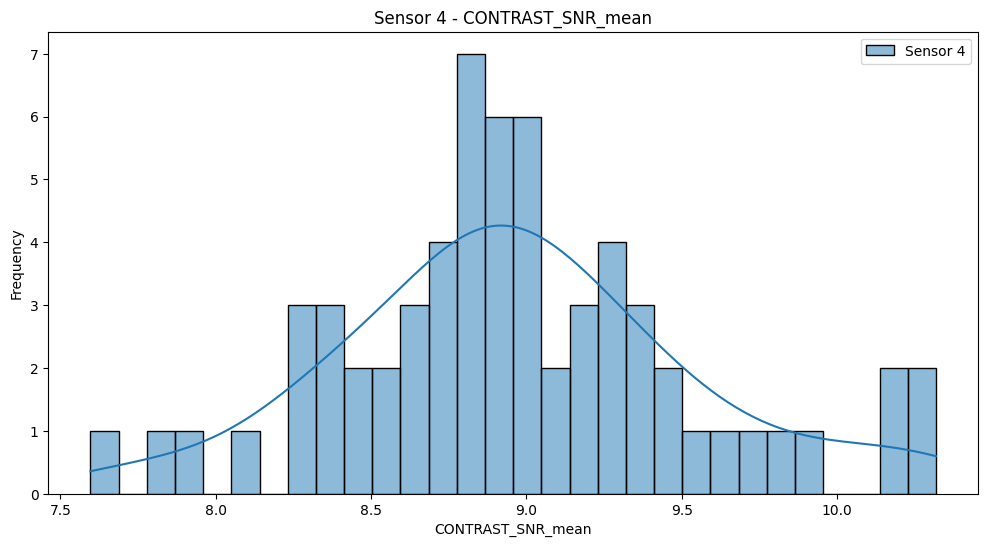

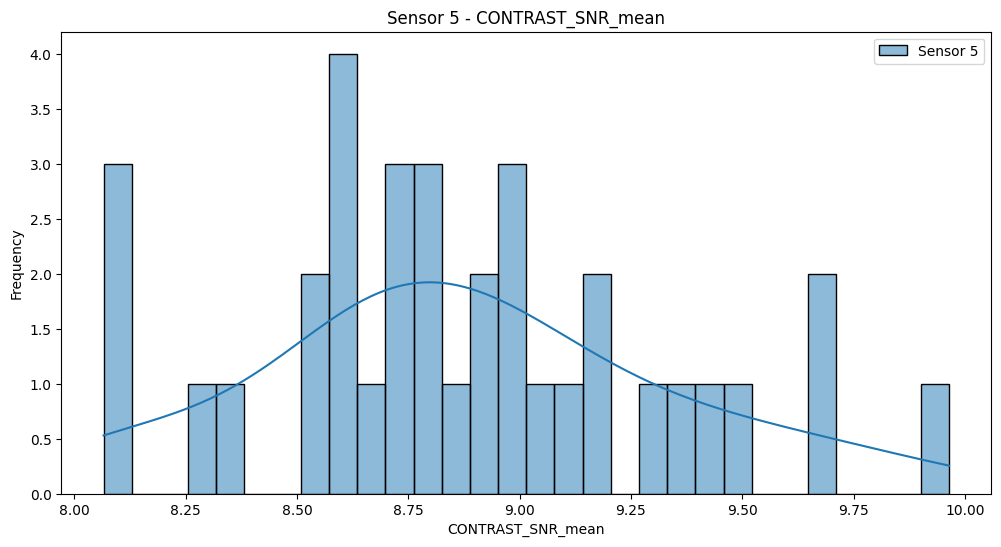

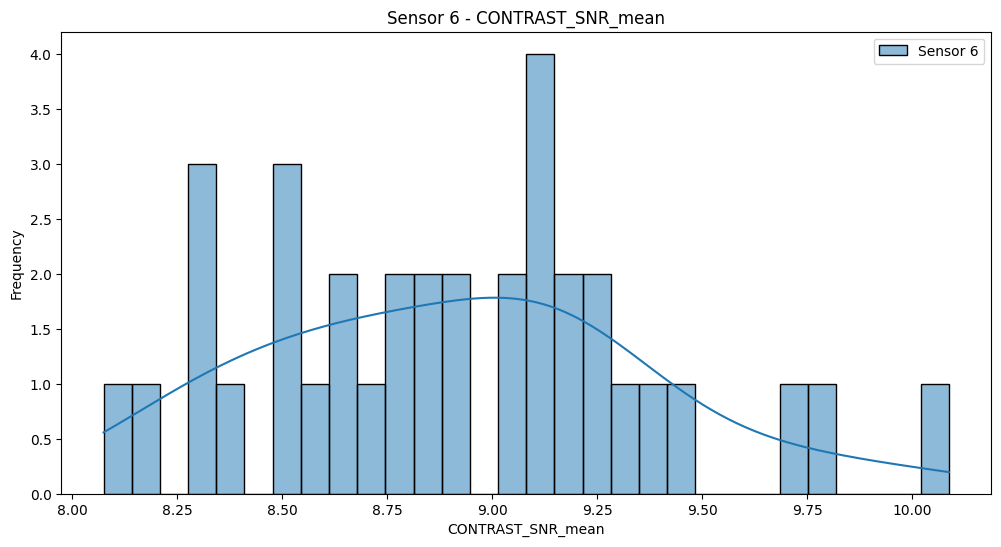

In [9]:
# Histograms
for sensor_id, sensor_data in data.groupby('sensor_id'):
    plt.figure(figsize=(12, 6))
    sns.histplot(sensor_data['CONTRAST_SNR_mean'], kde=True, label=f'Sensor {sensor_id}', bins=30)
    plt.title(f'Sensor {sensor_id} - CONTRAST_SNR_mean')
    plt.xlabel('CONTRAST_SNR_mean')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

Sensor 2 is skewed to the right and stands out as an outlier from the other sensors, implying the idea that it could be different from the other sensors. Both sensors 1 and 6 are slightly skewed to the left, furthering that there may be a possible similarity between the sensors. 

In [10]:
# Convert time to usable format
data['recording_date'] = pd.to_datetime(data['recording_date'])

"Signal-to-noise ratio (SNR or S/N) is a measure used in science and engineering that compares the level of a desired signal to the level of background noise. SNR is defined as the ratio of signal power to noise power, often expressed in decibels. A ratio higher than 1:1 (greater than 0 dB) indicates more signal than noise." This means that higher values usually correlate to a clearer signal. Therefore, a higher mean value indicates a better performance on average. 

In [11]:
contrast = data.groupby('sensor_id')['CONTRAST_SNR_mean'].mean().reset_index()
contrast.rename(columns={'CONTRAST_SNR_mean': 'Average CONTRAST_SNR mean', 'sensor_id': 'Sensor ID'}, inplace=True)

contrast = contrast.sort_values(by='Average CONTRAST_SNR mean', ascending=False)

print(contrast)

   Sensor ID  Average CONTRAST_SNR mean
3          4                   8.965951
1          2                   8.952238
2          3                   8.938720
0          1                   8.937053
5          6                   8.911552
4          5                   8.877654


This tells us that the best performance of a sensor is sensor 4. The clarity of the CONTRAST_SNR signal we should receive from the sensor 4 is the highest and it will only deteriorate as we descend down the sensor IDs. There does not seem to be an obvious correlation between the amount of data samples per sensor and the sensor's preformance.

In [12]:
energy = data.groupby('sensor_id')['ENERGY_SNR_mean'].mean().reset_index()
energy.rename(columns={'ENERGY_SNR_mean': 'Average ENERGY_SNR mean', 'sensor_id': 'Sensor ID'}, inplace=True)

energy = energy.sort_values(by='Average ENERGY_SNR mean', ascending=False)

print(energy)

   Sensor ID  Average ENERGY_SNR mean
2          3                 7.072331
1          2                 6.920081
3          4                 6.911536
5          6                 6.834656
0          1                 6.791763
4          5                 6.628777


Interestingly enough, the ENERGY_SNR does seem to follow a pattern similar to CONSTANT_SNR. There is a similar overall trend with 4, 2, and 3 being in the upper half performance-wise and 1, 5, and 6 being in the lower half. While the position of sensors 5 and 2 have stayed exactly the same, the rest have swapped places with the other sensor in their half. There also does not seem to be a correlation to the number of data entries in this case.

In [13]:
std_contrast = data.groupby('sensor_id')['CONTRAST_std'].mean().reset_index()
std_contrast.rename(columns={'CONTRAST_std': 'Average CONTRAST std', 'sensor_id': 'Sensor ID'}, inplace=True)

std_contrast = std_contrast.sort_values(by='Average CONTRAST std', ascending=False)

print(std_contrast)

   Sensor ID  Average CONTRAST std
1          2              1.103364
0          1              1.081386
5          6              1.061918
4          5              1.019974
3          4              1.005765
2          3              1.000173


In [14]:
std_energy = data.groupby('sensor_id')['ENERGY_SNR_std'].mean().reset_index()
std_energy.rename(columns={'ENERGY_SNR_std': 'Average ENERGY std', 'sensor_id': 'Sensor ID'}, inplace=True)

std_energy = std_energy.sort_values(by='Average ENERGY std', ascending=False)

print(std_energy)

   Sensor ID  Average ENERGY std
5          6            1.407276
2          3            1.358523
0          1            1.355147
1          2            1.342307
3          4            1.260836
4          5            1.240912


The STD of CONTRAST and ENERGY tell us the variability/consistency of the SNR values. A lower STD means that the sensor performs more consistently while a higher one indicates that the sensor varies a lot in its collection of data. On the basis of this, we can tell that sensors 1 and 6 both lack consistent performance in their data collection as they are in the upper half for both CONTRAST and ENERGY std collection. Inversely, sensors 4 and 5 perform very well and are consistent with their data collection, landing in the lower half of both STD values.

On basis of the fact that sensor 4 consistently scores high in it's signal quality on basis of its ENERGY_SNR_mean and CONSTANT_SNR_mean along with it's low variability in data collection, I would say off of the data above that it is the best sensor to use of the available options.

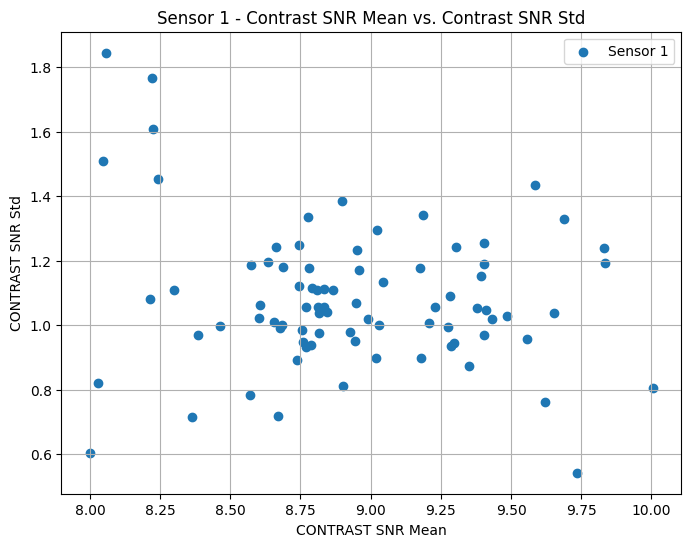

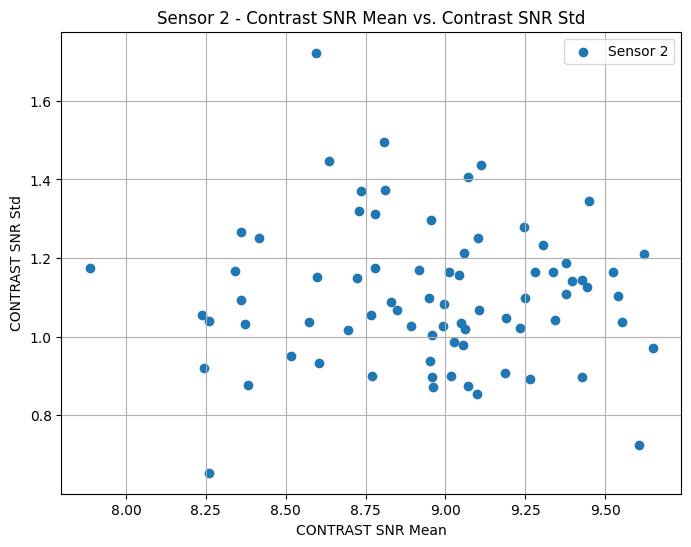

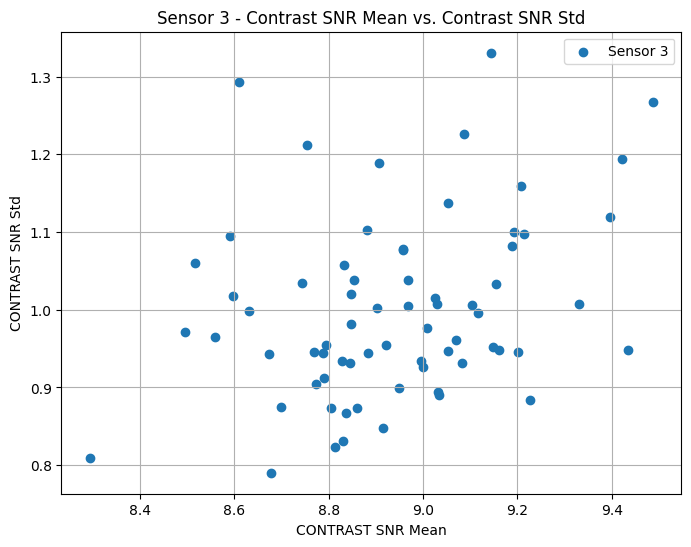

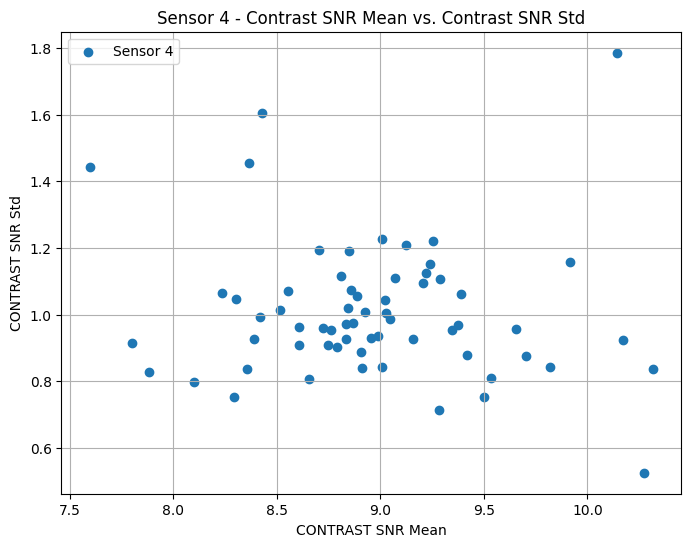

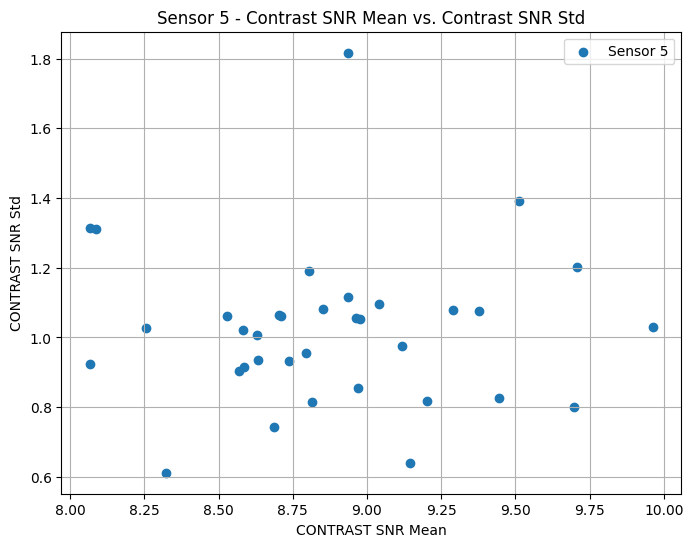

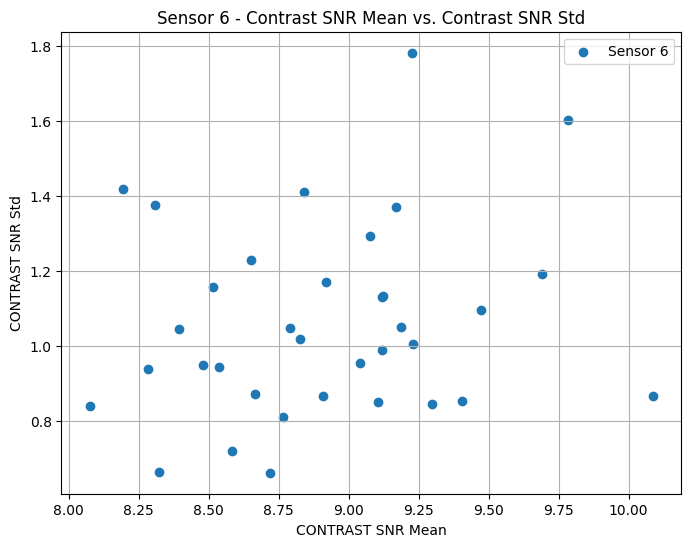

In [15]:
sensors = data.groupby('sensor_id')

# Sensor CONTRAST scatter plot
for sensor, sensdata in sensors:
    plt.figure(figsize=(8, 6))
    plt.scatter(sensdata['CONTRAST_SNR_mean'], sensdata['CONTRAST_std'], label=f'Sensor {sensor}')
    plt.title(f'Sensor {sensor} - Contrast SNR Mean vs. Contrast SNR Std')
    plt.xlabel('CONTRAST SNR Mean')
    plt.ylabel('CONTRAST SNR Std')
    plt.legend()
    plt.grid(True)
    plt.show()

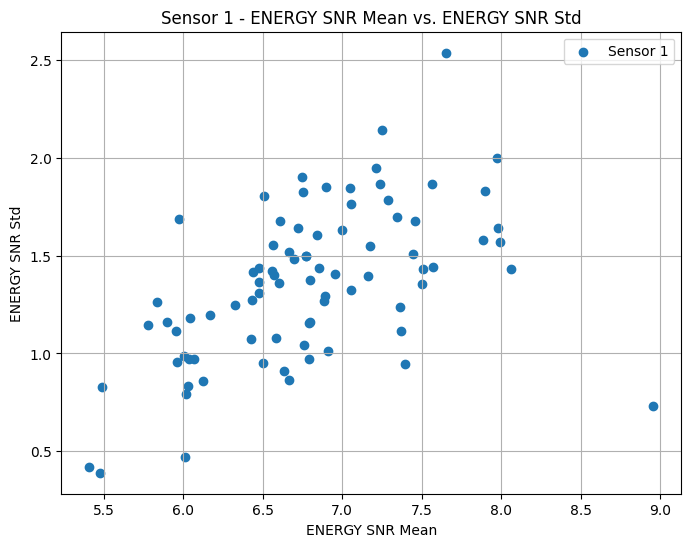

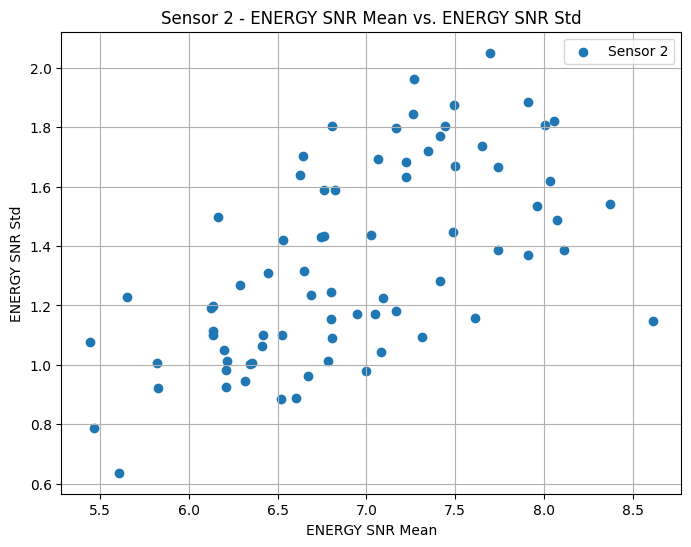

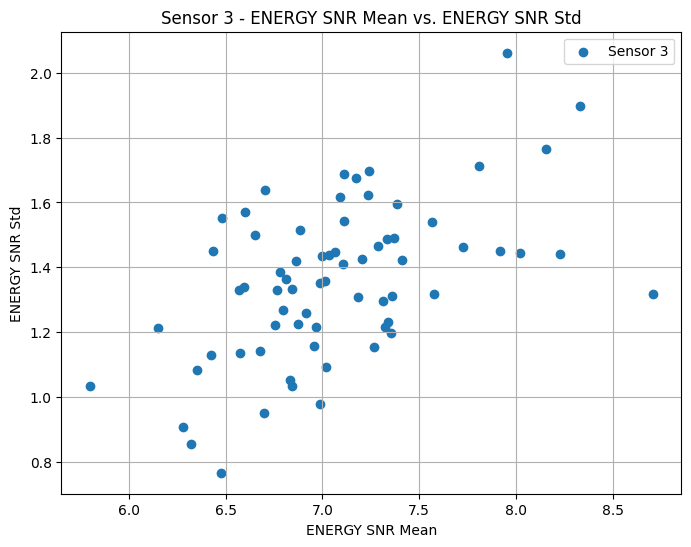

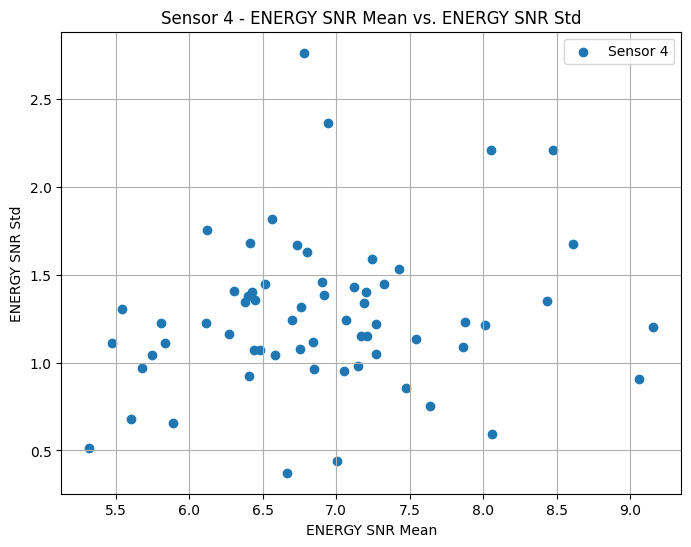

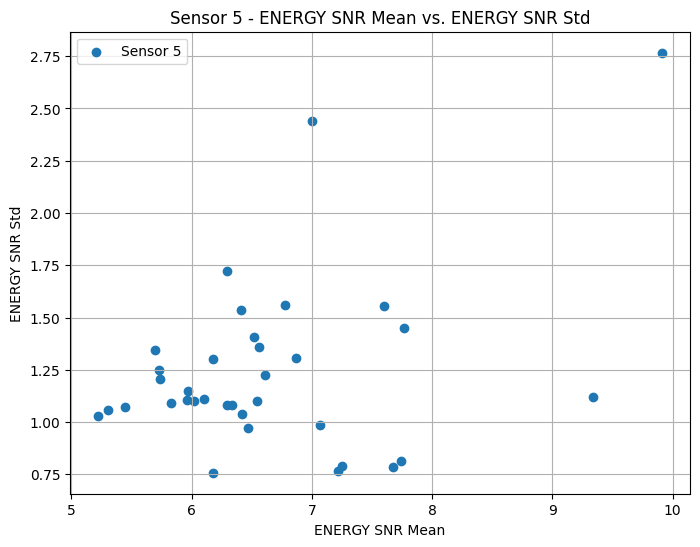

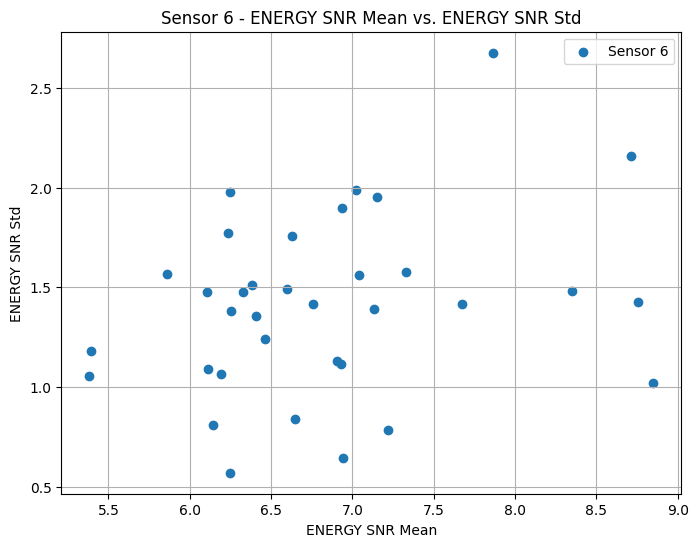

In [16]:
# Sensor ENERGY scatter plot
for sensor, sensdata in sensors:
    plt.figure(figsize=(8, 6))
    plt.scatter(sensdata['ENERGY_SNR_mean'], sensdata['ENERGY_SNR_std'], label=f'Sensor {sensor}')
    plt.title(f'Sensor {sensor} - ENERGY SNR Mean vs. ENERGY SNR Std')
    plt.xlabel('ENERGY SNR Mean')
    plt.ylabel('ENERGY SNR Std')
    plt.legend()
    plt.grid(True)
    plt.show()

Graphs 1 and 6 look very similar, except graph 1 has a lot more data points. On basis of the relatively varied clusters of the scatter plots, a kernel density estimator graph may be a better approach.

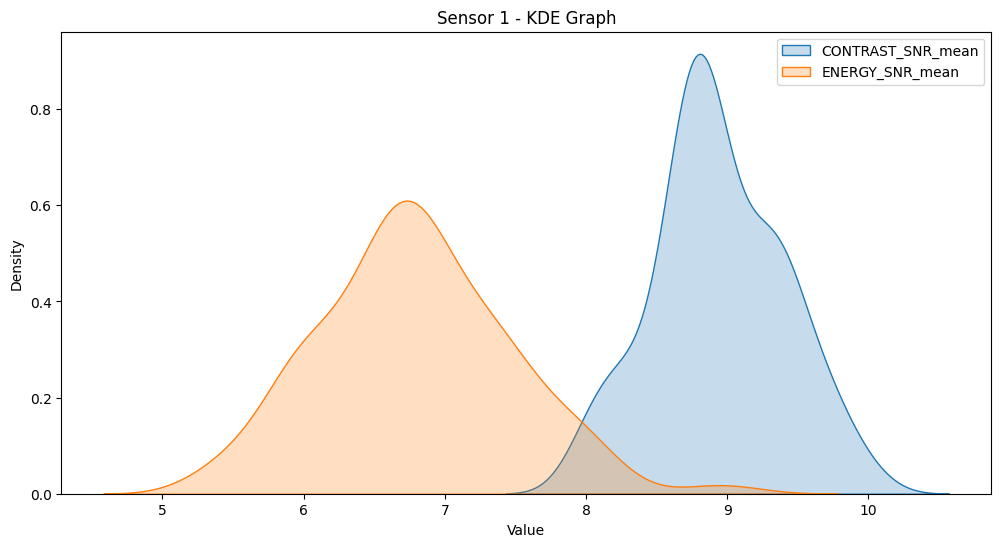

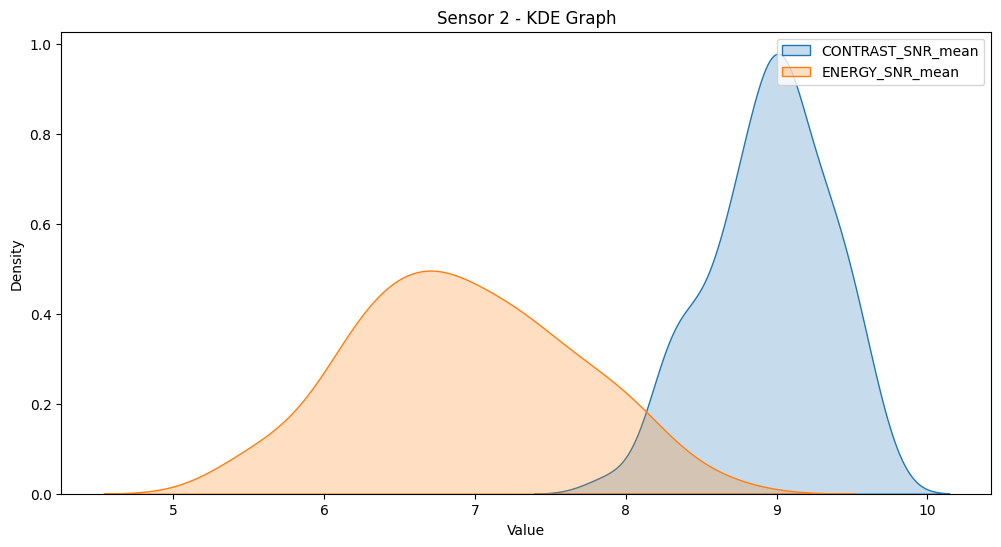

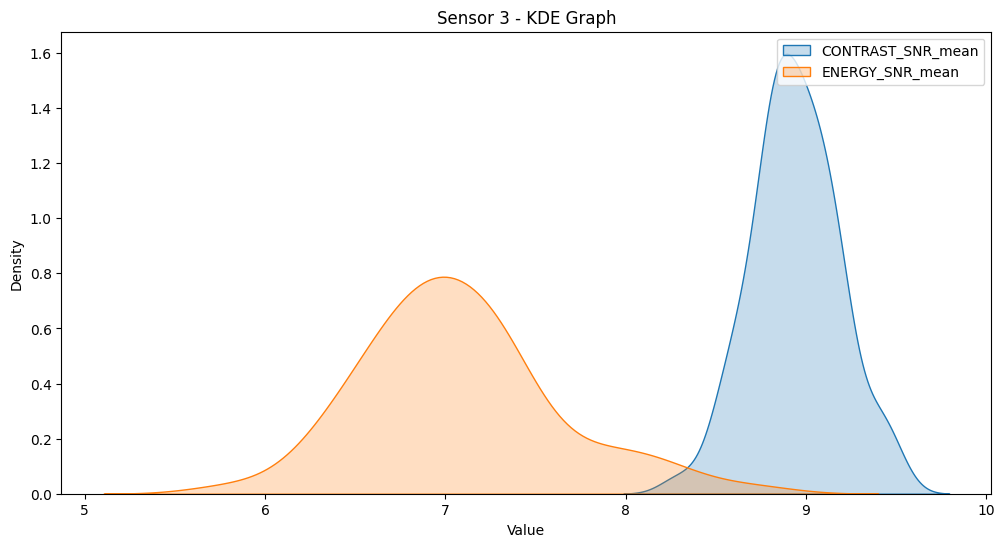

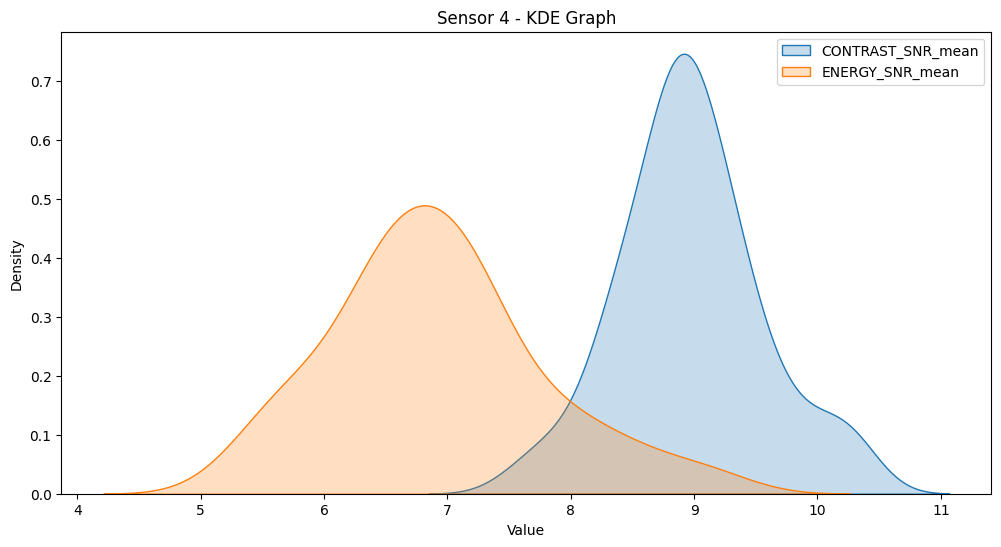

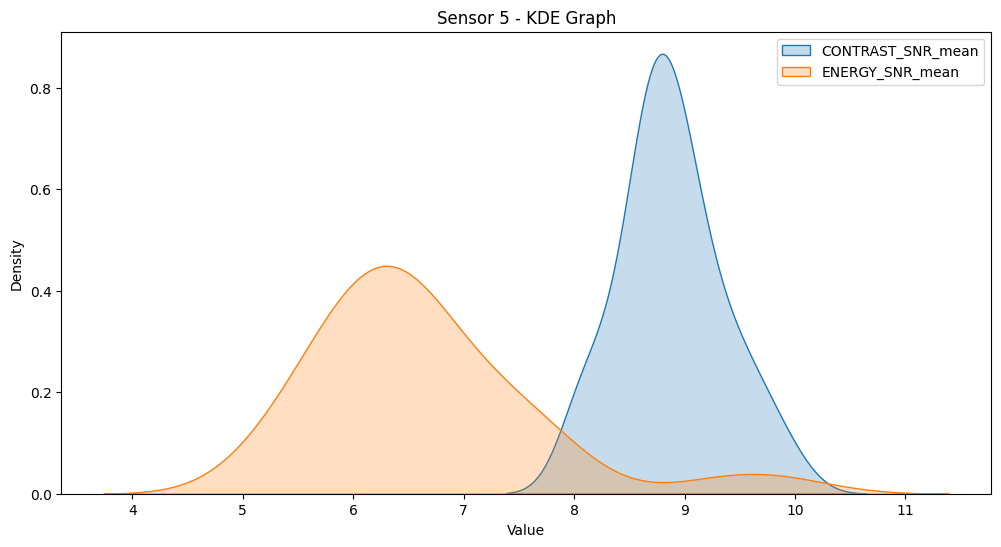

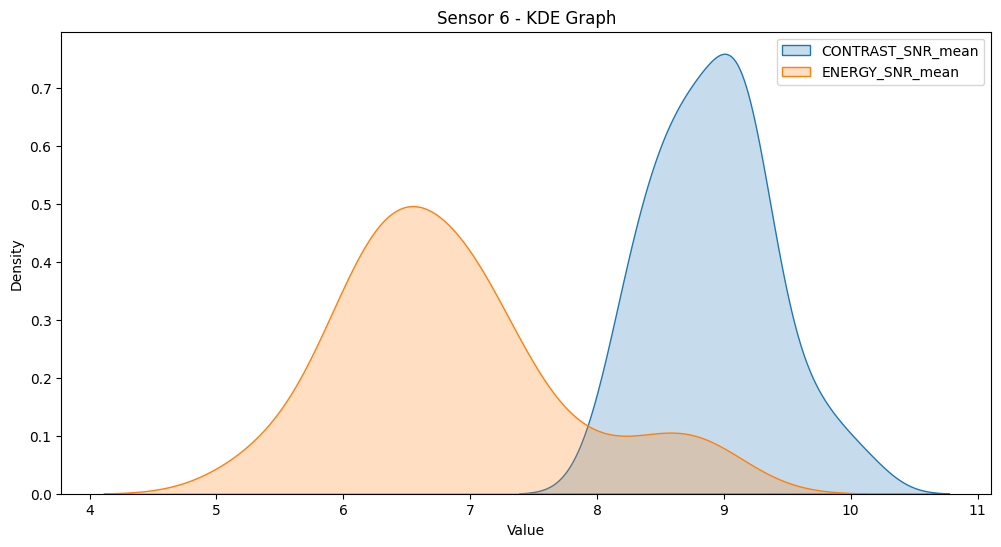

In [17]:
for sensor, sensdata in sensors:
    plt.figure(figsize=(12, 6))
    
    sns.kdeplot(sensdata['CONTRAST_SNR_mean'], label='CONTRAST_SNR_mean', fill=True)
    sns.kdeplot(sensdata['ENERGY_SNR_mean'], label='ENERGY_SNR_mean', fill=True)
    
    plt.title(f'Sensor {sensor} - KDE Graph')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

On the basis of the KDE clustering graphs, there seems to be a high level of similarity in the structure of the data for sensors 1, 4, and 6. Sensor 3 seems to stand a part from the rest with drastically less overlap compared to the other KDE graphs.

In [18]:
# Sensors to investigate
pairs = [(1, 4), (1, 6), (4, 6)]

# Pearson/spearman correlation coeffecients
def correlations_calc(sen1, sen2, data):
    data1 = data[data['sensor_id'] == sen1]
    data2 = data[data['sensor_id'] == sen2]
    
    # align data properly
    df = pd.merge(data1, data2, on='recording_date', suffixes=('_1', '_2'))
    
    # Pearson correlation
    pearson_contrast = df['CONTRAST_SNR_mean_1'].corr(df['CONTRAST_SNR_mean_2'], method='pearson')
    pearson_energy = df['ENERGY_SNR_mean_1'].corr(df['ENERGY_SNR_mean_2'], method='pearson')
    
    # Spearman correlation
    spearman_contrast = df['CONTRAST_SNR_mean_1'].corr(df['CONTRAST_SNR_mean_2'], method='spearman')
    spearman_energy = df['ENERGY_SNR_mean_1'].corr(df['ENERGY_SNR_mean_2'], method='spearman')
    
    return {
        'pearson_contrast': pearson_contrast,
        'pearson_energy': pearson_energy,
        'spearman_contrast': spearman_contrast,
        'spearman_energy': spearman_energy
    }

# Calculate correlations for each pair
results = {}
for sen1, sen2 in pairs:
    results[(sen1, sen2)] = correlations_calc(sen1, sen2, data)

# Display the results
for pair, corr in results.items():
    print(f"Sensor Pair: {pair}")
    print(f"\tPearson Contrast: {corr['pearson_contrast']}")
    print(f"\tPearson Energy: {corr['pearson_energy']}")
    print(f"\tSpearman Contrast: {corr['spearman_contrast']}")
    print(f"\tSpearman Energy: {corr['spearman_energy']}\n")

Sensor Pair: (1, 4)
	Pearson Contrast: 0.22630623959080104
	Pearson Energy: -0.13126618147581776
	Spearman Contrast: 0.21057860900058448
	Spearman Energy: -0.24833430742255994

Sensor Pair: (1, 6)
	Pearson Contrast: 0.30311103944239737
	Pearson Energy: -0.08677505870990285
	Spearman Contrast: 0.30608504398826974
	Spearman Energy: 0.028225806451612902

Sensor Pair: (4, 6)
	Pearson Contrast: 0.10781253931985334
	Pearson Energy: -0.058534239127313564
	Spearman Contrast: 0.13168449197860962
	Spearman Energy: -0.071524064171123



On the basis of the other graphs and EDA enacted above, there seems to be a repeating trend showing a relationship of some sort between sensors 1, 4, and 6. The Pearson coefficient describes the linear relationship between the variables, and the overwhelmingly strongest overall correlation exists between sensors 1 and 6, followed by sensors 1 and 4 in regards to the Pearson of the contrast SNR. Similarly, sensor pairs 1 and 6 also evidently have the strongest overall correlation for the Spearman of the Contrast SNR. The Spearmen measures the trend between two variables. Sensor pairs 1 and 4 have strong Pearson and Spearmen coefficients for Energy SNR. Overall, this means we can discount the sensor pair 4,6 in their similarity and assume that either sensor pair 1 and 6 are the same or 1 and 4. On the basis of the repetition of the other similar trends in previous steps, it is likely that sensors 1 and 6 are the most similar.

Another note is the reptition of 3 being an outlier in previous steps, indicating that it is likely a different sensor then the other sensors.